In [11]:
import boto3
session = boto3.Session(
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name='us-east-2'
)

In [52]:
import boto3
import pandas as pd
from io import StringIO

#Crear una sesión y meter credenciales
session = boto3.Session(
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name='us-east-2'
)

s3 = session.client('s3')
bucket_name = 'ebac-dl4'
file_key = 'house-data/housedata.csv'

#Descargar el archivo CSV en memoria
csv_obj = s3.get_object(Bucket=bucket_name, Key=file_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

#Leer el CSV con pandas
df = pd.read_csv(StringIO(csv_string))

#Mostrar las primeras filas del DataFrame
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [53]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
avg_bedrooms = df['bedrooms'].mean()
min_bedrooms = df['bedrooms'].min()
max_bedrooms = df['bedrooms'].max()

print(f"Promedio de dormitorios: {avg_bedrooms}")
print(f"Mínimo de dormitorios: {min_bedrooms}")
print(f"Máximo de dormitorios: {max_bedrooms}")

Promedio de dormitorios: 3.37084162309721
Mínimo de dormitorios: 0
Máximo de dormitorios: 33


In [50]:
import numpy as np
# Asegúrate de reemplazar df con el nombre real de tu DataFrame
df['price'] = df['price'].astype(np.int64)

## 3 preguntas que al negocio le puede interesar

C:\Users\Bodok\AppData\Local\Temp\ipykernel_6420\2833163506.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_por_zipcode, x='zipcode', y='price', palette='viridis')


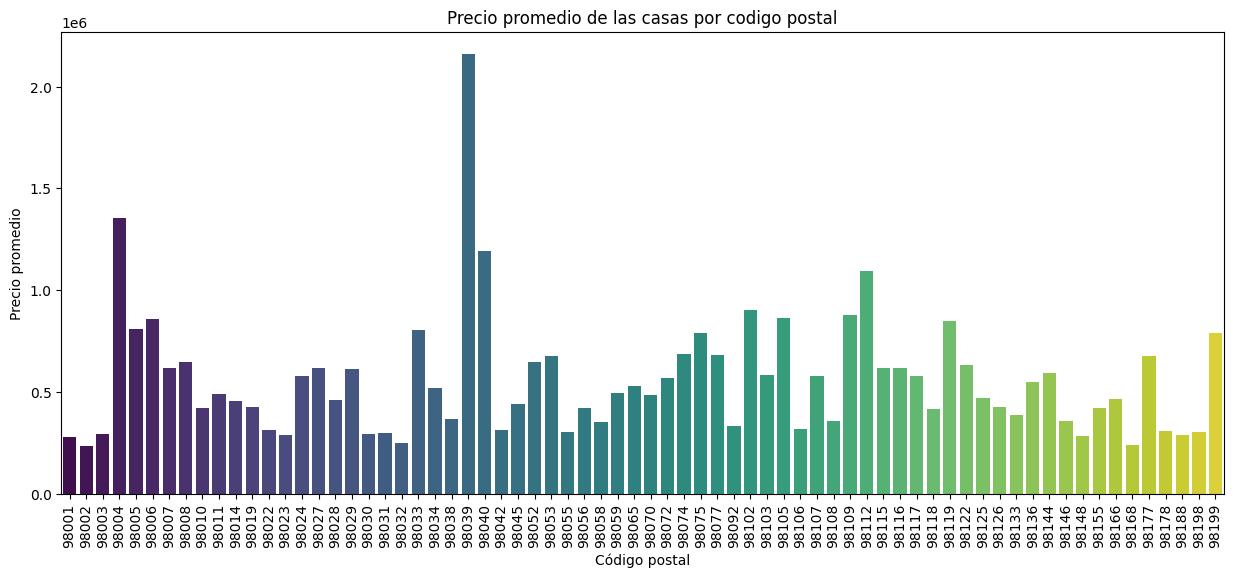

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio del precio por código postal
precio_por_zipcode = df.groupby('zipcode')['price'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(data=precio_por_zipcode, x='zipcode', y='price', palette='viridis')
plt.title('Precio promedio de las casas por codigo postal')
plt.xlabel('Código postal')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)
plt.show()

C:\Users\Bodok\AppData\Local\Temp\ipykernel_6420\4202631796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='waterfront', y='price', palette='pastel')


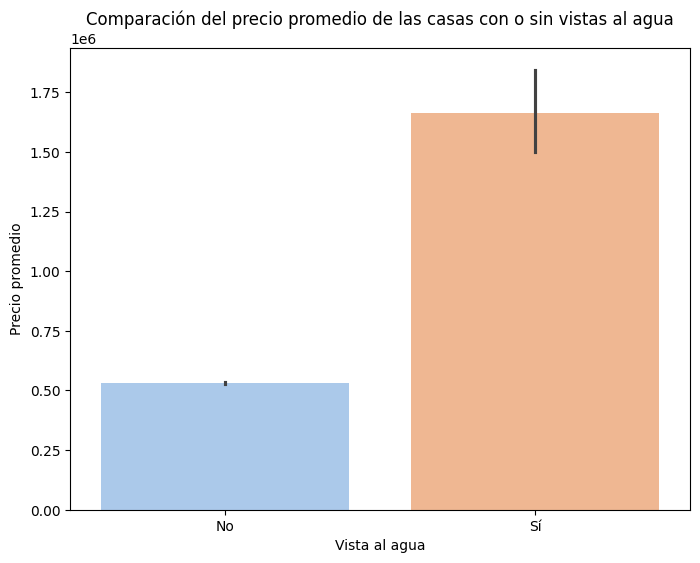

In [84]:
# Comparar el precio promedio entre casas con y sin vista al agua
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='waterfront', y='price', palette='pastel')
plt.title('Comparación del precio promedio de las casas con o sin vistas al agua')
plt.xlabel('Vista al agua')
plt.ylabel('Precio promedio')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

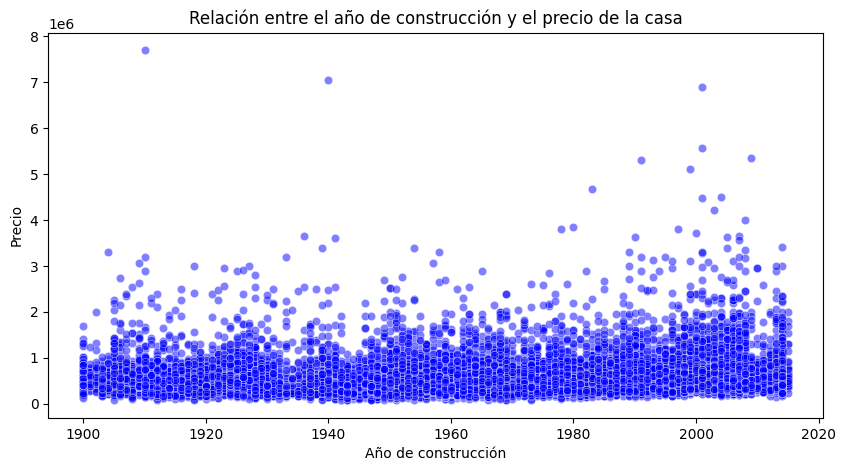

In [80]:
# Relación entre el año de construcción y el precio
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='yr_built', y='price', alpha=0.5, color='blue')
plt.title('Relación entre el año de construcción y el precio de la casa')
plt.xlabel('Año de construcción')
plt.ylabel('Precio')
plt.show()

## KPI

In [89]:
max_price = df['price'].max()
min_price = df['price'].min()
avg_price = df['price'].mean()

print("El precio más alto es: ", max_price)
print("El precio más bajo es: ", min_price)
print("El precio promedio es: ", avg_price)


El precio más alto es:  7700000.0
El precio más bajo es:  75000.0
El precio promedio es:  540182.1587933188


In [92]:
total_waterfront = df['waterfront'].sum()
print("Total de casas con vista al mar: ", total_waterfront)

Total de casas con vista al mar:  163


In [94]:
max_sqft_living = df['sqft_living'].max()
min_sqft_living = df['sqft_living'].min()

print("Tamaño de casa máximo en pies cuadrados: ",max_sqft_living)
print("Tamaño de casa minimo en pies cuadrados: ", min_sqft_living)

Tamaño de casa máximo en pies cuadrados:  13540
Tamaño de casa minimo en pies cuadrados:  290
